In [7]:
import glob

import numpy as np

from skimage.io import imread
from skimage.feature import hog

from skimage import exposure

import matplotlib.pyplot as plt

Class containing detail of the features

In [8]:
class FeaturesRGB:
    def __init__(self, hog_params):
        
        self.orientations = hog_params['orientations']
        self.pixels_per_cell = hog_params['pixels_per_cell']
        self.cells_per_block = hog_params['cells_per_block']
        self.block_norm = hog_params['block_norm']
        
        
    def cal_hog(self, img, channel):
        
        self.RGB_img = img
        self.img_dmns = img.shape
        
        self.R_image = img[:, :, 0]
        self.G_image = img[:, :, 1]
        self.B_image = img[:, :, 2]
        
        #(n_blocks_row, n_blocks_col, n_cells_row, n_cells_col, n_orient) 
        self.R_hogd, self.R_hog_image = hog(self.R_image,
                                            orientations = self.orientations,
                                            pixels_per_cell = self.pixels_per_cell,
                                            cells_per_block = self.cells_per_block,
                                            visualize = True)
        
        
        self.G_hogd, self.G_hog_image = hog(self.G_image,
                                            orientations = self.orientations,
                                            pixels_per_cell = self.pixels_per_cell,
                                            cells_per_block = self.cells_per_block,
                                            visualize = True)
        
                
        
        self.B_hogd, self.B_hog_image = hog(self.B_image,
                                            orientations = self.orientations,
                                            pixels_per_cell = self.pixels_per_cell,
                                            cells_per_block = self.cells_per_block,
                                            visualize = True)
        
        hog_flatten = np.hstack((self.R_hogd, self.G_hogd, self.B_hogd))
        
        
        
        
        print(self.R_hogd.shape)
        #print(self.B_hog_image.shape)
        
        fig, ax = plt.subplots(1, 2, figsize=(10, 5))
        
        ax[0].axis('off')
        ax[0].title.set_text('Original')
        #R_hog_image_rescaled = exposure.rescale_intensity(self.R_hog_image, in_range=(0, 10))
        #ax[0].imshow(R_hog_image_rescaled, cmap=plt.cm.gray)
        ax[0].imshow(self.RGB_img)
        
        ax[1].axis('off')
        ax[1].title.set_text('HOG (pixels_per_cell 16x16)')
        R_hog_image_rescaled = exposure.rescale_intensity(self.R_hog_image, in_range=(0, 10))
        ax[1].imshow(R_hog_image_rescaled, cmap=plt.cm.gray)
        
        #ax[2].axis('off')
        #B_hog_image_rescaled = exposure.rescale_intensity(self.B_hog_image, in_range=(0, 10))
        #ax[2].imshow(B_hog_image_rescaled, cmap=plt.cm.gray)  
        
        return hog_flatten

HOG parameters, paths for dataset

In [14]:
hog_params = {
    'orientations': 11, # number of bins
    'pixels_per_cell': (8, 8), # normally (8,8), refers to 8x8 pixels are used to calculate hog
    'cells_per_block': (2, 2),
    'block_norm': 'L2-Hys'
}

ftrRGB = FeaturesRGB(hog_params)
lft_paths = glob.glob('./preliminary/img_cropped/resized/*.jpg')


Actual programming

Load lateral flow test images, get HOG and add to the feature list ...
./preliminary/img_cropped/resized\train1.JPG
(7084,)
./preliminary/img_cropped/resized\train10.JPG
(7084,)
./preliminary/img_cropped/resized\train11.JPG
(7084,)
./preliminary/img_cropped/resized\train2.JPG
(7084,)
./preliminary/img_cropped/resized\train3.JPG
(7084,)
./preliminary/img_cropped/resized\train4.JPG
(7084,)
./preliminary/img_cropped/resized\train5.JPG
(7084,)
./preliminary/img_cropped/resized\train6.JPG
(7084,)
./preliminary/img_cropped/resized\train7.JPG
(7084,)
./preliminary/img_cropped/resized\train8.JPG
(7084,)
./preliminary/img_cropped/resized\train9.JPG
(7084,)


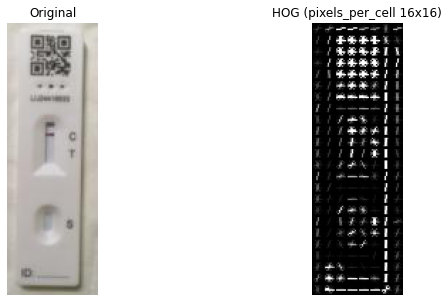

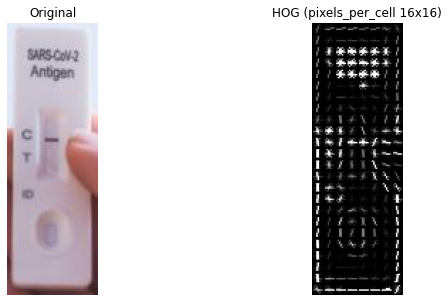

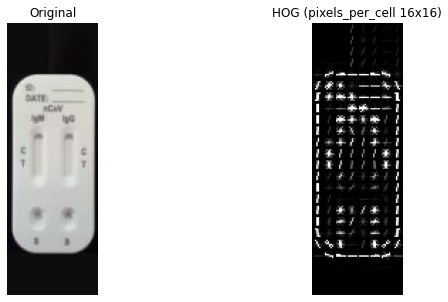

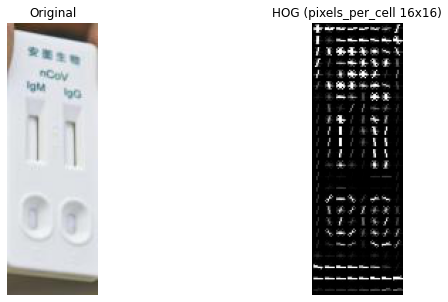

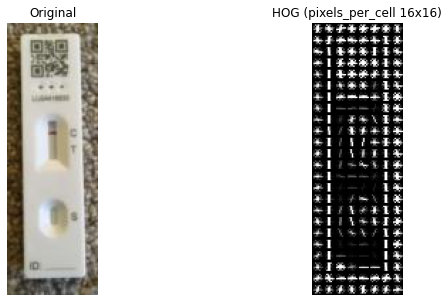

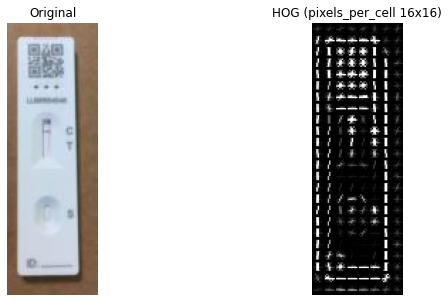

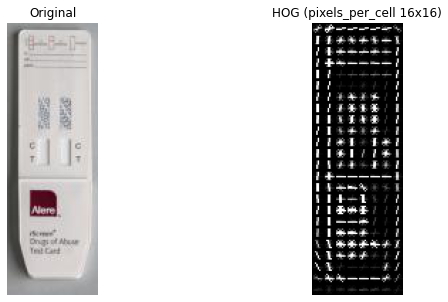

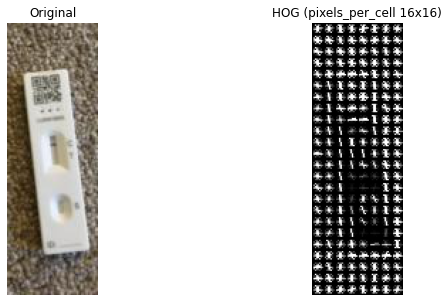

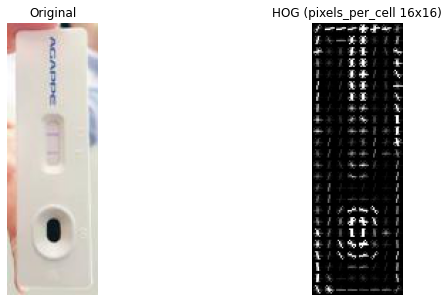

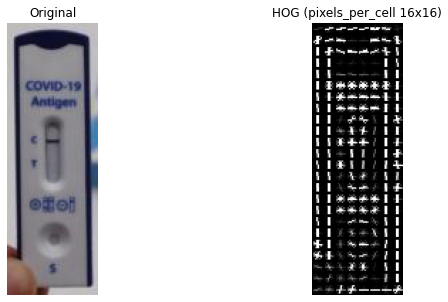

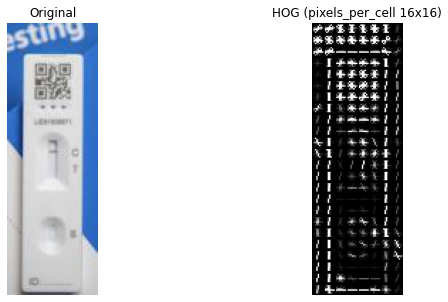

In [16]:
print("Load lateral flow test images, get HOG and add to the feature list ...")

lft_features = []

for path in lft_paths: 
    print(path)
    lft_img = imread(path) 

    hog_flatten = ftrRGB.cal_hog(lft_img, 0)
    
    lft_features.append(hog_flatten)
    #break
    
    #lft_img = np.asarray(lft_imgs)

In [11]:
lft_features = np.asarray(lft_features)